## preamble

In [17]:
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
from scipy.spatial import distance

 sns.set()

## globals

In [18]:
seed = 1234
n_points = 1000
bins = 100
no_quantile = 10

## generate toy data in 2D

In [19]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 100])

means = [xx.mean(), yy.mean()]  

stds = [xx.std() / 3, yy.std() / 3]

corr = 0.7         # correlation

covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

(d1, d2) = np.random.multivariate_normal(means, covs, n_points).T

X = np.concatenate((d1.reshape(n_points, 1), d2.reshape(n_points, 1)), axis=1)
X = pd.DataFrame(X, columns=['d1', 'd2'])
X.sample(10)

,d1,d2
592,28.001858,56.102033
876,35.203320,49.551555
902,17.720275,27.791694
589,24.134340,47.174228
654,18.447615,49.982734
987,31.679438,61.209395
322,14.480008,30.010028
318,28.718571,47.614293
18,35.113999,59.326448
815,10.452694,17.147690


## visualize the data

<IPython.core.display.Javascript object>


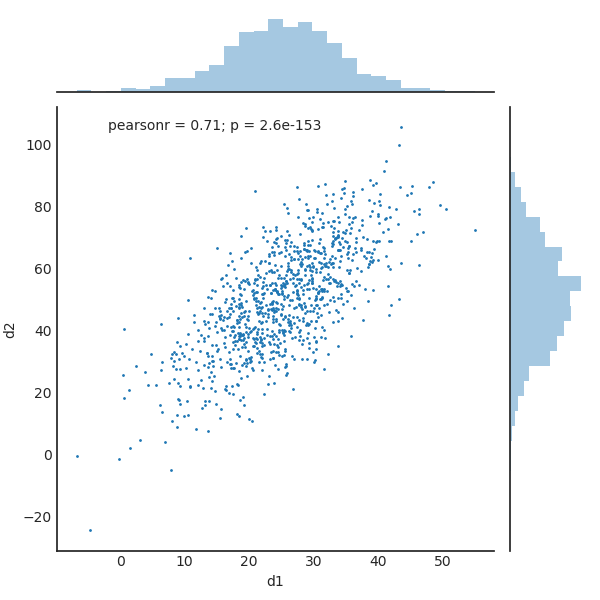

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


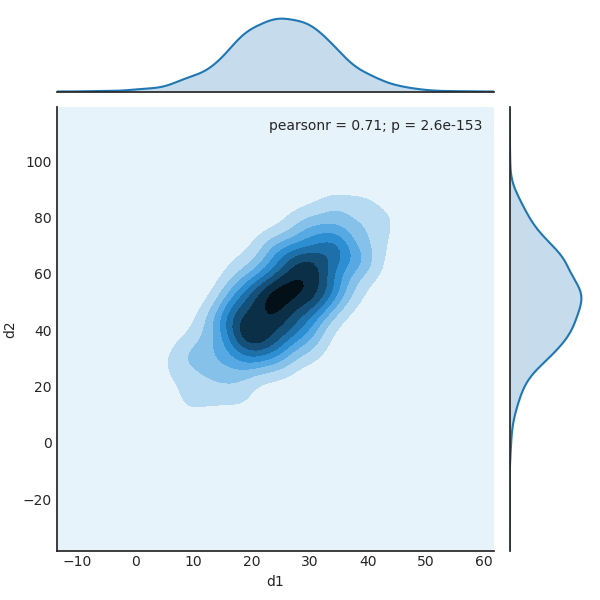

In [20]:
with sns.axes_style('white'):
    sns.jointplot(X['d1'], X['d2'], kind='scatter', s=1)
    sns.jointplot('d1', 'd2', X, kind='kde')

## define quantiles and their labels

In [21]:
quantiles = np.arange(no_quantile+1)/no_quantile
quantiles

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [22]:
quantile_labels = (np.arange(no_quantile)+1)/no_quantile
quantile_labels

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## calculate mahalanobis distance

In [23]:
import pandas as pd
import scipy as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

X['mahala'] = mahalanobis(x=X, data=X)
X.sample(3)

,d1,d2,mahala
833,25.478795,54.726313,0.108667
675,22.234527,51.814675,0.339744
143,17.389877,39.700980,0.829045


## calculate euclidean distance

In [35]:
def euclidean(row):
    point = [row['d1'], row['d2']]
    ref = [0.0]*len(point)
    dst = distance.euclidean(ref, point)
    return dst

X['euclidean'] = X.apply(euclidean, axis=1)
X.sample(3)

,d1,d2,mahala,euclidean
427,22.345770,29.809585,1.963323,37.255131
102,17.838098,35.320707,0.884676,39.569560
780,31.183366,37.915048,3.401714,49.091274


## calculate quantiles

### based on mahalanobis distance

In [42]:
X['quantile_mahalanobis'] = pd.qcut(X['mahala'], q=no_quantile, labels=quantile_labels)
pd.value_counts(X['quantile_mahalanobis'].values)

1.0    100
0.9    100
0.8    100
0.7    100
0.6    100
0.5    100
0.4    100
0.3    100
0.2    100
0.1    100
dtype: int64

### based on euclidean distance

In [43]:
X['quantile_euclidean'] = pd.qcut(X['euclidean'], q=no_quantile, labels=quantile_labels)
pd.value_counts(X['quantile_euclidean'].values)

1.0    100
0.9    100
0.8    100
0.7    100
0.6    100
0.5    100
0.4    100
0.3    100
0.2    100
0.1    100
dtype: int64

In [44]:
X.sample(3)

,d1,d2,mahala,euclidean,quantile_mahalanobis,quantile_euclidean
309,38.019588,53.350166,3.676755,65.511291,0.9,0.7
188,31.280337,50.643962,0.936456,59.525376,0.4,0.6
825,18.576414,31.813959,1.173360,36.840347,0.5,0.2


## plot quantiles

<IPython.core.display.Javascript object>


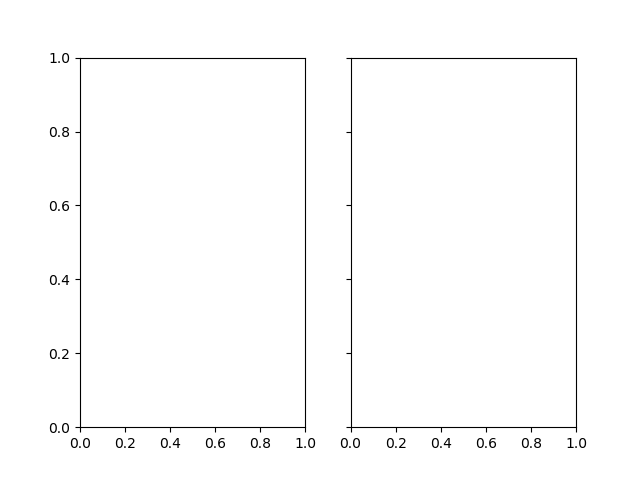

<IPython.core.display.Javascript object>


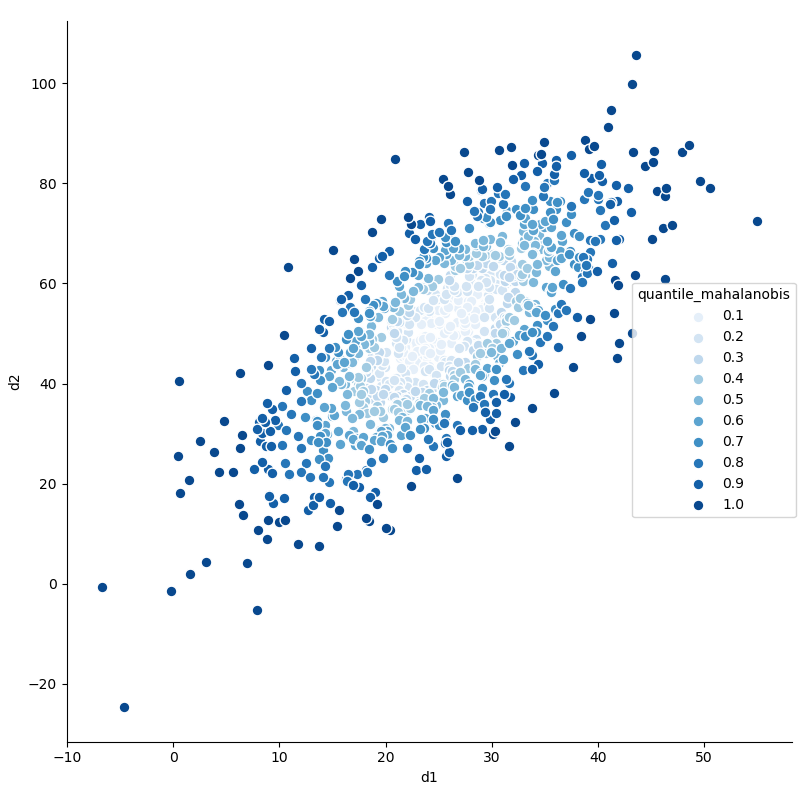

<IPython.core.display.Javascript object>


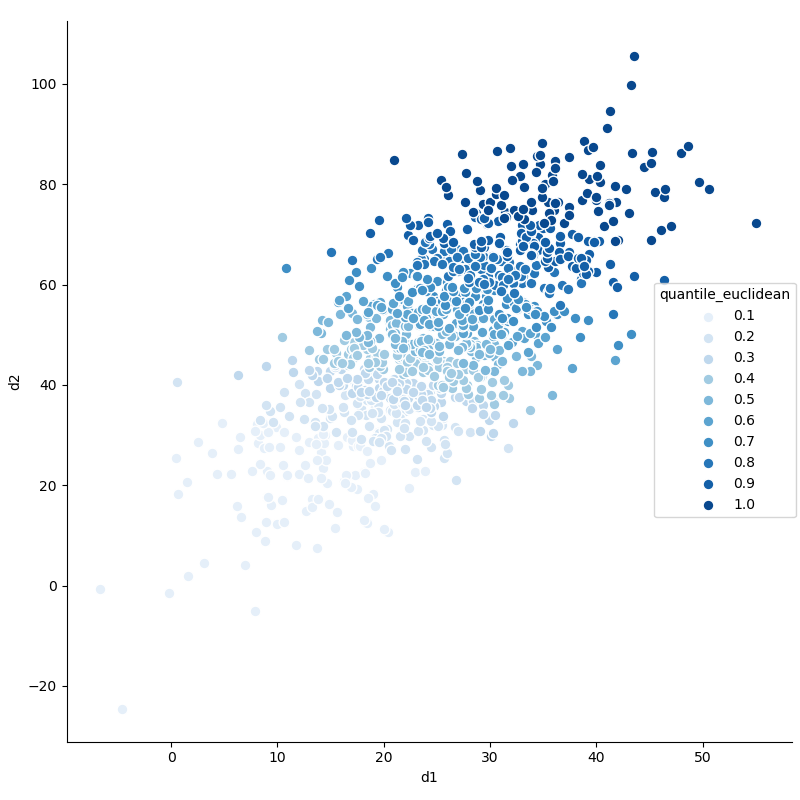

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.pairplot(#ax=ax1,
                data=X, 
                x_vars=['d1'], 
                y_vars=['d2'], 
                size=8, 
                plot_kws=dict(s=60, alpha=1), 
                hue="quantile_mahalanobis", 
                palette="Blues")

sns.pairplot(#ax=ax2,
                data=X, 
                x_vars=['d1'], 
                y_vars=['d2'], 
                size=8, 
                plot_kws=dict(s=60, alpha=1), 
                hue="quantile_euclidean", 
                palette="Blues")